Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever se um passageiro iria ou não Sobreviver ao Titanic de acordo com sua Idade,Sexo,Parentes,Tarifa,Primos/Marido/Esposa/Pais/Filhos abordo

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/competitions/titanic/data

# Pré-Processamento



In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [339]:
df = pd.read_csv('/content/drive/MyDrive/UP/Ciência de Dados/Notebooks/data/train.csv',
                    sep=',', encoding='utf-8')

In [340]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Primeiro faço a limpeza e excluo colunas que não interessam e possuem nulos (Nome, Cabine, Ticket, IdPassageiro)

In [342]:
df = df.drop("Name", 1)
df = df.drop("Cabin", 1)
df = df.drop("Ticket", 1)
df = df.drop("PassengerId", 1)
df = df.dropna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [343]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


Transformando as variáveis categóricas nominais em variáveis categóricas ordinais

In [344]:
df = df.rename(columns={"Survived": "Sobreviveu", "Pclass": "Classe", "Sex": "Sexo","Age": "Idade", "SibSp": "PrimosEEsposas", "Parch": "PaisFilhos", "Fare": "Tarifa", "Embarked": "Porta"})

In [345]:
df

,Sobreviveu,Classe,Sexo,Idade,PrimosEEsposas,PaisFilhos,Tarifa,Porta
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [346]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [347]:
encoder = OneHotEncoder()
oneHotEncoder = encoder.fit_transform(df[['Sexo', 'Porta']])

In [348]:
oneHotEncoder.todense()

matrix([[0., 1., 0., 0., 1.],
        [1., 0., 1., 0., 0.],
        [1., 0., 0., 0., 1.],
        ...,
        [1., 0., 0., 0., 1.],
        [0., 1., 1., 0., 0.],
        [0., 1., 0., 1., 0.]])

In [349]:
oneHotEncoder.shape

(712, 5)

In [350]:
nome_colunas = encoder.get_feature_names(['Sexo', 'Porta'])
df3_encoder = pd.DataFrame(oneHotEncoder.todense(), columns= nome_colunas)
df3_encoder

,Sexo_female,Sexo_male,Porta_C,Porta_Q,Porta_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
707,1.0,0.0,0.0,1.0,0.0
708,0.0,1.0,0.0,0.0,1.0
709,1.0,0.0,0.0,0.0,1.0
710,0.0,1.0,1.0,0.0,0.0


In [351]:
df2 = pd.concat([df, df3_encoder], axis=1).drop(['Sexo', 'Porta'], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sobreviveu      712 non-null    float64
 1   Classe          712 non-null    float64
 2   Idade           712 non-null    float64
 3   PrimosEEsposas  712 non-null    float64
 4   PaisFilhos      712 non-null    float64
 5   Tarifa          712 non-null    float64
 6   Sexo_female     712 non-null    float64
 7   Sexo_male       712 non-null    float64
 8   Porta_C         712 non-null    float64
 9   Porta_Q         712 non-null    float64
 10  Porta_S         712 non-null    float64
dtypes: float64(11)
memory usage: 80.6 KB


In [331]:
df

,Sobreviveu,Classe,Sexo,Idade,PrimosEEsposas,PaisFilhos,Tarifa,Porta
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [352]:
df2 =df2.dropna(0)

In [353]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 710
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sobreviveu      564 non-null    float64
 1   Classe          564 non-null    float64
 2   Idade           564 non-null    float64
 3   PrimosEEsposas  564 non-null    float64
 4   PaisFilhos      564 non-null    float64
 5   Tarifa          564 non-null    float64
 6   Sexo_female     564 non-null    float64
 7   Sexo_male       564 non-null    float64
 8   Porta_C         564 non-null    float64
 9   Porta_Q         564 non-null    float64
 10  Porta_S         564 non-null    float64
dtypes: float64(11)
memory usage: 52.9 KB


In [354]:
previsores = df2.iloc[:, 1:11].values

In [355]:
previsores

array([[ 3., 22.,  1., ...,  0.,  0.,  1.],
       [ 1., 38.,  1., ...,  1.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 1., 42.,  0., ...,  0.,  1.,  0.],
       [ 1., 22.,  0., ...,  0.,  0.,  1.],
       [ 1., 24.,  0., ...,  1.,  0.,  0.]])

In [356]:
previsores.shape

(564, 10)

In [357]:
alvo = df2.iloc[:, 0].values

In [358]:
alvo

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0.

In [359]:
alvo.shape

(564,)

# Padronização

In [360]:
df2.describe()

,Sobreviveu,Classe,Idade,PrimosEEsposas,PaisFilhos,Tarifa,Sexo_female,Sexo_male,Porta_C,Porta_Q,Porta_S
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,0.407801,2.225177,30.016401,0.539007,0.443262,35.174852,0.358156,0.641844,0.171986,0.037234,0.790780
std,0.491862,0.841215,14.611731,0.955625,0.871071,51.614221,0.479884,0.479884,0.377703,0.189503,0.407113
min,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,16.100000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,34.865650,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [361]:
from sklearn.preprocessing import StandardScaler

In [362]:
previsores

array([[ 3., 22.,  1., ...,  0.,  0.,  1.],
       [ 1., 38.,  1., ...,  1.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 1., 42.,  0., ...,  0.,  1.,  0.],
       [ 1., 22.,  0., ...,  0.,  0.,  1.],
       [ 1., 24.,  0., ...,  1.,  0.,  0.]])

In [363]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [364]:
previsores_esc

array([[ 0.92189374, -0.54911475,  0.48282786, ..., -0.45575079,
        -0.19665715,  0.51436756],
       [-1.4577313 ,  0.54686789,  0.48282786, ...,  2.19418162,
        -0.19665715, -1.94413503],
       [ 0.92189374, -0.27511909, -0.56453719, ..., -0.45575079,
        -0.19665715,  0.51436756],
       ...,
       [-1.4577313 ,  0.82086354, -0.56453719, ..., -0.45575079,
         5.08499192, -1.94413503],
       [-1.4577313 , -0.54911475, -0.56453719, ..., -0.45575079,
        -0.19665715,  0.51436756],
       [-1.4577313 , -0.41211692, -0.56453719, ...,  2.19418162,
        -0.19665715, -1.94413503]])

In [365]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3,4,5,6,7,8,9
0,0.921894,-0.549115,0.482828,-0.509322,-0.541510,-0.747001,0.747001,-0.455751,-0.196657,0.514368
1,-1.457731,0.546868,0.482828,-0.509322,0.700204,1.338686,-1.338686,2.194182,-0.196657,-1.944135
2,0.921894,-0.275119,-0.564537,-0.509322,-0.528421,1.338686,-1.338686,-0.455751,-0.196657,0.514368
3,-1.457731,0.341371,0.482828,-0.509322,0.347599,1.338686,-1.338686,-0.455751,-0.196657,0.514368
4,0.921894,0.341371,-0.564537,-0.509322,-0.525997,-0.747001,0.747001,-0.455751,-0.196657,0.514368
...,...,...,...,...,...,...,...,...,...,...
559,-0.267919,0.615367,-0.564537,-0.509322,-0.177916,-0.747001,0.747001,-0.455751,-0.196657,0.514368
560,-0.267919,1.026360,-0.564537,-0.509322,-0.420312,-0.747001,0.747001,-0.455751,-0.196657,0.514368
561,-1.457731,0.820864,-0.564537,-0.509322,-0.172341,1.338686,-1.338686,-0.455751,5.084992,-1.944135
562,-1.457731,-0.549115,-0.564537,-0.509322,2.256712,-0.747001,0.747001,-0.455751,-0.196657,0.514368


In [366]:
from sklearn.model_selection import train_test_split

In [367]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [368]:
x_treino.shape

(394, 10)

In [369]:
x_teste.shape

(170, 10)

In [370]:
y_treino.shape

(394,)

In [371]:
y_teste.shape

(170,)

## **RESUMO PRÉ-PROCESSAMENTO**

alvo = variável que se pretende atingir (Sobreviveu ou não a Crash).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

# Algoritomos

## Regressão Logistica

In [372]:
from sklearn.linear_model import LogisticRegression

lbfgs, não importando C e nem penalidade
Acurácia: 71.76%   y treino 0.7258883248730964

In [ ]:
#logistica = LogisticRegression(random_state=1, max_iter=500, penalty="l2",
#                               tol=0.0001, C=2,solver="lbfgs")
#logistica.fit(x_treino, y_treino)

In [536]:
logistica = LogisticRegression(random_state=2, max_iter=500, penalty="elasticnet",
                               tol=0.0001, C=2,solver="saga",l1_ratio=0.5)
logistica.fit(x_treino, y_treino)

LogisticRegression(C=2, l1_ratio=0.5, max_iter=500, penalty='elasticnet',
                   random_state=2, solver='saga')

In [537]:
logistica.intercept_

array([-0.54936062])

In [538]:
logistica.coef_

array([[-0.90800111, -0.70217691, -0.24302402,  0.13496715,  0.05106214,
         0.12061532, -0.12061532,  0.        , -0.06158726,  0.19761044]])

In [539]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.])

In [540]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [542]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 72.35%


Verificado que em diversos scenários utilizando o solver como sage e aplicando um ratio de 0.5 conseguiu um aumento de quase 1% na acuracia ficando com 72.35% de acuracia

In [543]:
confusion_matrix(y_teste, previsoes_logistica)

array([[80,  8],
       [39, 43]])

In [544]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

         0.0       0.67      0.91      0.77        88
         1.0       0.84      0.52      0.65        82

    accuracy                           0.72       170
   macro avg       0.76      0.72      0.71       170
weighted avg       0.75      0.72      0.71       170



In [545]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0.

In [546]:
accuracy_score(y_treino, previsoes_treino)

0.7233502538071066

In [547]:
confusion_matrix(y_treino, previsoes_treino)

array([[215,  31],
       [ 78,  70]])

Regressão Logística 72.35%



## Arvore de Decisão

In [513]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [649]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=10)
#arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0)
_arvore = arvore.fit(x_treino, y_treino)

[Text(0.5625, 0.9545454545454546, 'X[0] <= 0.327\nentropy = 0.955\nsamples = 394\nvalue = [246, 148]'),
 Text(0.3019230769230769, 0.8636363636363636, 'X[1] <= -0.857\nentropy = 0.999\nsamples = 196\nvalue = [94, 102]'),
 Text(0.2865384615384615, 0.7727272727272727, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.3173076923076923, 0.7727272727272727, 'X[4] <= 0.332\nentropy = 0.999\nsamples = 182\nvalue = [94, 88]'),
 Text(0.21923076923076923, 0.6818181818181818, 'X[1] <= 1.609\nentropy = 0.972\nsamples = 122\nvalue = [73, 49]'),
 Text(0.14615384615384616, 0.5909090909090909, 'X[3] <= 0.065\nentropy = 0.994\nsamples = 103\nvalue = [56, 47]'),
 Text(0.1076923076923077, 0.5, 'X[4] <= 0.321\nentropy = 0.979\nsamples = 89\nvalue = [52, 37]'),
 Text(0.09230769230769231, 0.4090909090909091, 'X[4] <= -0.197\nentropy = 0.986\nsamples = 86\nvalue = [49, 37]'),
 Text(0.06153846153846154, 0.3181818181818182, 'X[2] <= -0.041\nentropy = 0.925\nsamples = 50\nvalue = [33, 17]'),
 Text(0.04615

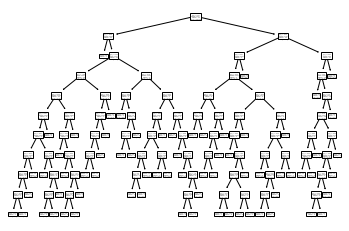

In [650]:
tree.plot_tree(_arvore)

In [651]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.])

In [652]:
y_teste

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.])

In [653]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [654]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 71.18%


In [655]:
confusion_matrix(y_teste, previsoes_arvore)

array([[74, 14],
       [35, 47]])

In [656]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

         0.0       0.68      0.84      0.75        88
         1.0       0.77      0.57      0.66        82

    accuracy                           0.71       170
   macro avg       0.72      0.71      0.70       170
weighted avg       0.72      0.71      0.71       170



In [657]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [658]:
accuracy_score(y_treino, previsoes_treino)

0.8629441624365483

In [659]:
confusion_matrix(y_treino, previsoes_treino)

array([[234,  12],
       [ 42, 106]])

Verificado que a Arvorê com profundidade de 10 é uma das unícas que possui taxa de acurácia acima de 70% sendo assim foi utilizada a profundidade 10 entregando 71.18% de Ácurácia 

## RANDOM FORESTS

In [660]:
from sklearn.ensemble import RandomForestClassifier

In [841]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 1, max_depth=12)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=150,
                       random_state=1)

In [842]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.])

In [843]:
y_teste

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.])

In [844]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [845]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 71.76%


In [846]:
confusion_matrix(y_teste, previsoes_random)

array([[74, 14],
       [34, 48]])

In [847]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

         0.0       0.69      0.84      0.76        88
         1.0       0.77      0.59      0.67        82

    accuracy                           0.72       170
   macro avg       0.73      0.71      0.71       170
weighted avg       0.73      0.72      0.71       170



In [848]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [849]:
accuracy_score(y_treino, previsoes_treino)

0.9720812182741116

In [850]:
confusion_matrix(y_treino, previsoes_treino)

array([[245,   1],
       [ 10, 138]])

AS profundidades 12 e 5 demonstraram o mesmo resultado mâximo de 71,76% de Acurâcia ao rodar o algoritimo de random forests porêm a acurâcia do treino na profundidade 5 é de 77,92% enquanto na profundidade 12 é de 97,20% sendo assim foi escolhida a profundiade 12

## **Resultado comparação entre Algoritimos**

Considerando que os resultados obtidos pelo algoritimo de Regressão Logítica via solver saga o algoritímo mostrou desempenho melhor em relação ao algoritimo random forests , porém caso seja utilizado outro solver o mesmo terá a mesma porcentagem de acurácia que o algoritimo random forests , então consistentemente pode se dizer que o algoritimo que trouxe o menor resultado foi o de Arvore singular de Decisão